In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

from models.BernoulliBandit import BernoulliDynamicBandit
from utils.calc_p import asymptotic_expectation_zero, objective
import multiprocessing

# 获取CPU核心数量
num_cores = multiprocessing.cpu_count()
print(f"Number of CPU cores available: {num_cores}")

# 设置多核运行
pool = multiprocessing.Pool(processes=num_cores-2)


Number of CPU cores available: 24


### 离散J分布
离散J分包括有限的J分布和无限取值的J分布，reward平稳性检验（已证实）

C:\Users\Administrator\AppData\Local\Temp\ipykernel_22168\511958257.py:11: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  discrete_J_distribution = ('discrete', list(range(3, 3+20-1)), [1/(np.e*np.math.factorial(i)) for i in range(0, 0+20-1)]) # 阶乘数列


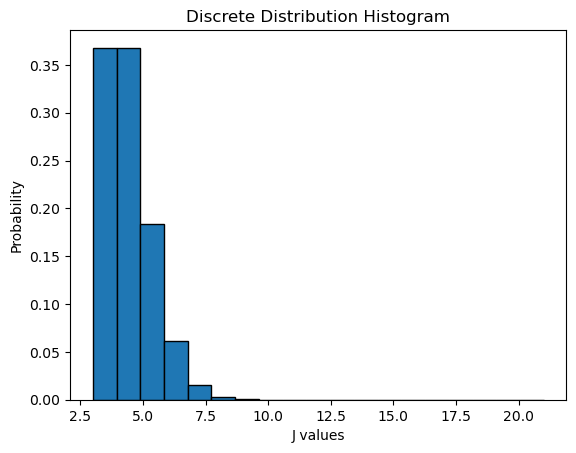

In [2]:
# 动态采样的J的采样分布

# 有限散点分布
# discrete_J_distribution = ('discrete', [6], [1])
# discrete_J_distribution = ('discrete', [4, 6], [0.4, 0.6])
# discrete_J_distribution = ('discrete', [3, 5, 7, 10], [0.2, 0.3, 0.3, 0.2])

# 奥列夫0的离散分布

# 1/n!求和
discrete_J_distribution = ('discrete', list(range(3, 3+20-1)), [1/(np.e*np.math.factorial(i)) for i in range(0, 0+20-1)]) # 阶乘数列

# 1/2为公比的等比数列
# discrete_J_distribution = ('discrete', list(range(3, 3+50-1)), [0.5**i for i in range(1, 1+50-1)]) 

# 1/ n**2求和
# discrete_J_distribution = ('discrete', list(range(3, 3+100-1)), np.array([6/np.pi**2 * 1/i**2 for i in range(1, 1+100-1)])/np.sum(np.array(([6/np.pi**2 * 1/i**2 for i in range(1, 1+100-1)])))) # 等差数列

# 均匀分布
# discrete_J_distribution = ('discrete', list(range(3, 3+100)), [1/100]*100)

# 画出离散分布的分布直方图
plt.hist(discrete_J_distribution[1], weights=discrete_J_distribution[2], bins=len(discrete_J_distribution[1]), edgecolor='black')
plt.title('Discrete Distribution Histogram')
plt.xlabel('J values')
plt.ylabel('Probability')
plt.show()

discrete Distribution Initialized with J=4, calculated p=0.3427
discrete 分布 初始化 J=4, 计算得到单局win rate p=0.34270189386162414


Simulating paths:   0%|          | 0/5000 [00:00<?, ?it/s]

Plotting paths:   0%|          | 0/5000 [00:00<?, ?it/s]

d:\Anaconda3\envs\rl\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


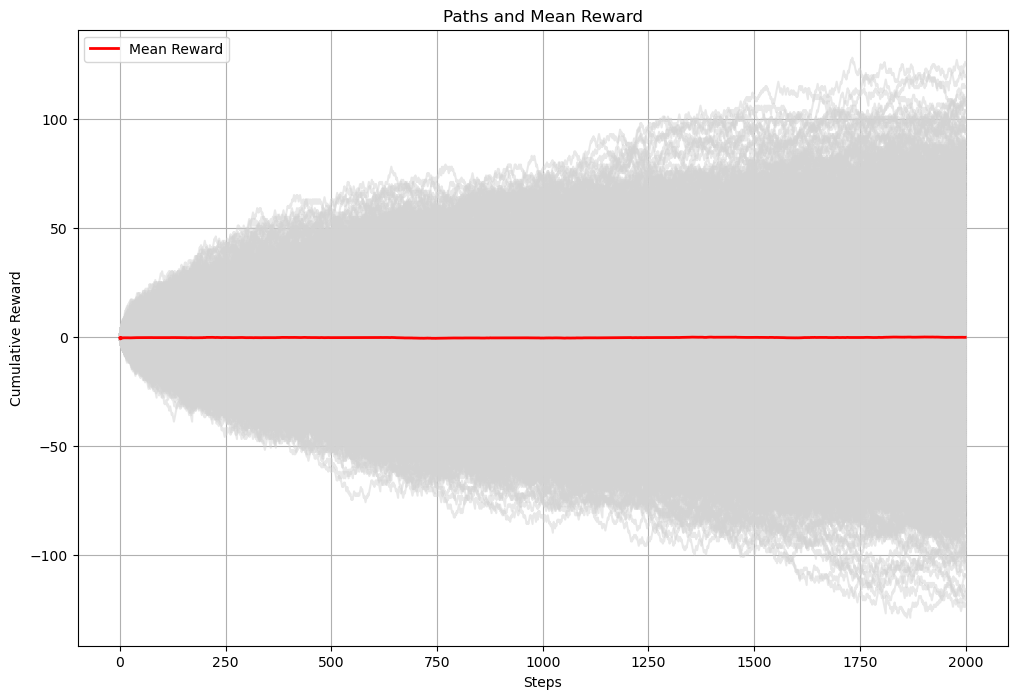

In [3]:
# 创建 DynamicSlotMachine实例, 并运行多条路径以获得平均奖励测试平稳性 
# (离散分布）
slot_machine_discrete = BernoulliDynamicBandit(
    J_distribution=discrete_J_distribution,
    num_steps=2000,
    seed=42  # 设置随机种子以获得可重复的结果
)


# 模拟多条路径
num_paths = 5000
all_rewards_discrete = slot_machine_discrete.simulate_multiple_paths(num_paths=num_paths, j_state_init=0,)

discrete_mean_reward = slot_machine_discrete.plot_paths_with_mean(all_rewards_discrete)

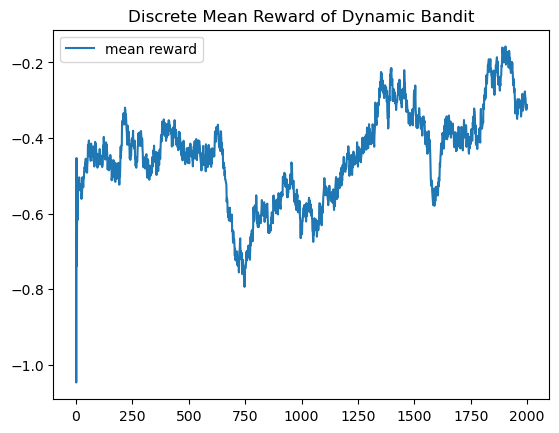

In [4]:
plt.plot(discrete_mean_reward, label='mean reward')
plt.title('Discrete Mean Reward of Dynamic Bandit')
plt.legend()
plt.show()

### 连续J分布
连续J分包括非对称的随机的连续分布/有界的分布/对称的分布，reward平稳性检验（已证实）
注意：若sample J的时候不取整，奖励的时候取整
不太平稳，怀疑和取值的上取整下取整/不对称性有关。需要更多实验

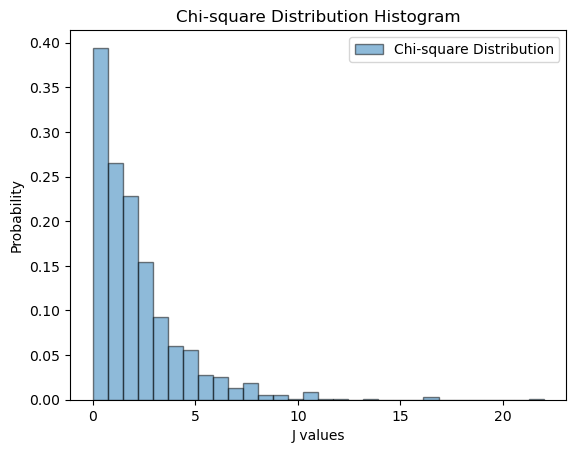

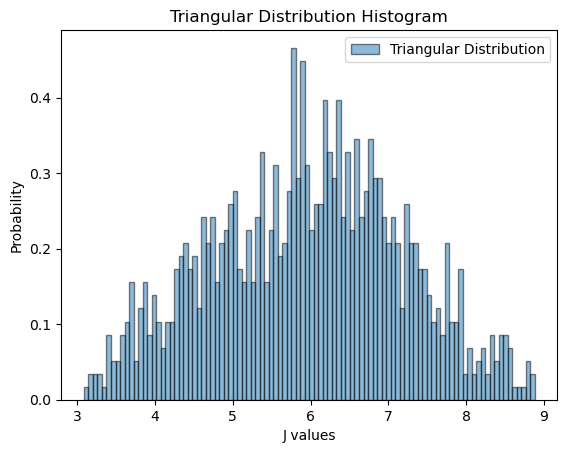

In [3]:
# 动态采样的J的采样分布

# 选择连续分布示例（卡方分布，自由度为2）
chisquare_J_distribution = ('chisquare', 2)

# 对称三角形分布
x = np.linspace(3, 9, 1000)
triangular_J_distribution = ('triangular', 3, 6, 9)

# 画出卡方分布的分布直方图
samples = np.random.chisquare(df=chisquare_J_distribution[1], size=1000)
plt.hist(samples, bins=30, density=True, edgecolor='black', alpha=0.5, label='Chi-square Distribution')
plt.title('Chi-square Distribution Histogram')
plt.xlabel('J values')
plt.ylabel('Probability')
plt.legend()
plt.show()

# 画出对称三角形分布的分布直方图
samples = np.random.triangular(left=triangular_J_distribution[1], mode=triangular_J_distribution[2], right=triangular_J_distribution[3], size=1000)
plt.hist(samples, bins=100, density=True, edgecolor='black', alpha=0.5, label='Triangular Distribution')
plt.title('Triangular Distribution Histogram')
plt.xlabel('J values')
plt.ylabel('Probability')
plt.legend()
plt.show()

#### 不对称连续分布示例（卡方分布，自由度为2）

chisquare Distribution Initialized with J=3.938536179953718, calculated p=0.3332
chisquare 分布 初始化 J=3.938536179953718, 计算得到单局win rate p=0.33323087213613534


Simulating paths:   0%|          | 0/1000 [00:00<?, ?it/s]

d:\Projects\FairBanditDesign\BernoulliRewards\models\BernoulliBandit.py:129: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  p_solution, = fsolve(asymptotic_expectation_zero, p_initial_guess, args=(J,))


Plotting paths:   0%|          | 0/1000 [00:00<?, ?it/s]

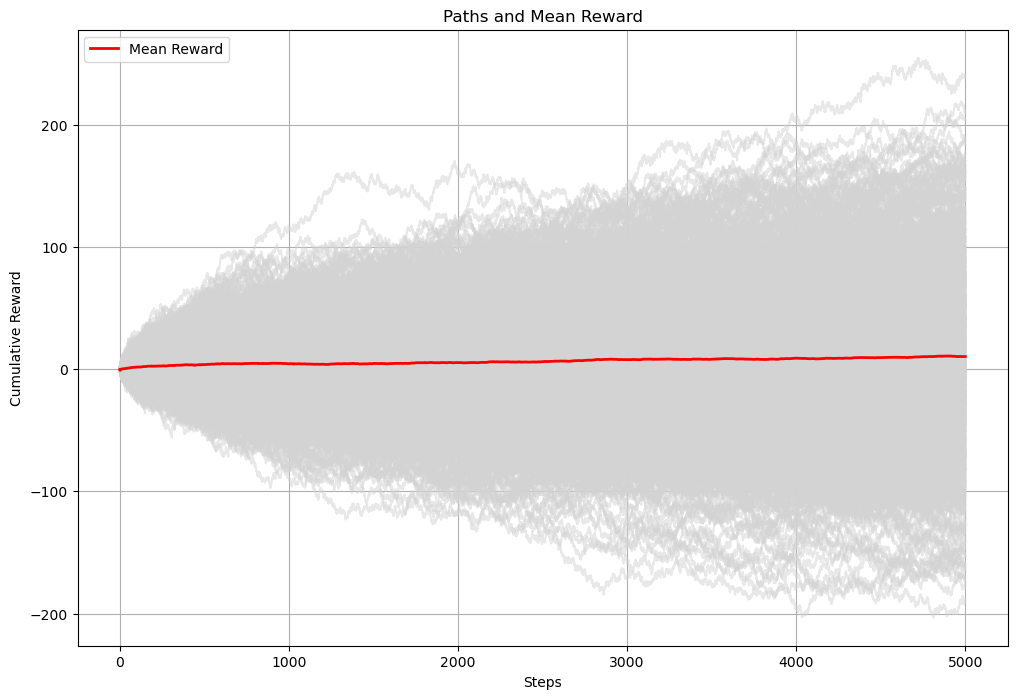

In [4]:
# 创建 DynamicSlotMachine实例, 并运行多条路径以获得平均奖励测试平稳性 

# (连续分布 - 不对称代表 卡方分布 )
slot_machine_continue = BernoulliDynamicBandit(
    J_distribution=chisquare_J_distribution,
    num_steps=5000,
    seed=42  # 设置随机种子以获得可重复的结果
)

# 模拟多条路径
num_paths = 1000

all_rewards_continue = slot_machine_continue.simulate_multiple_paths(num_paths=num_paths, j_state_init=0,)

continue_mean_reward = slot_machine_continue.plot_paths_with_mean(all_rewards_continue)

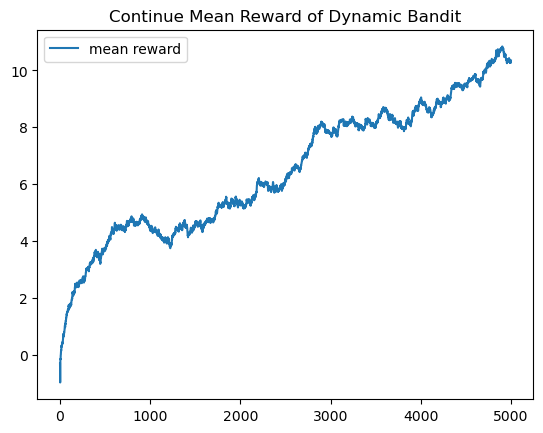

In [5]:
plt.plot(continue_mean_reward, label='mean reward')
plt.title('Continue Mean Reward of Dynamic Bandit')
plt.legend()
plt.show()

#### 对称连续分布-三角分布

triangular Distribution Initialized with J=5.596482647593187, calculated p=0.4564
triangular 分布 初始化 J=5.596482647593187, 计算得到单局win rate p=0.4564296804404376


Simulating paths:   0%|          | 0/1000 [00:00<?, ?it/s]

Plotting paths:   0%|          | 0/1000 [00:00<?, ?it/s]

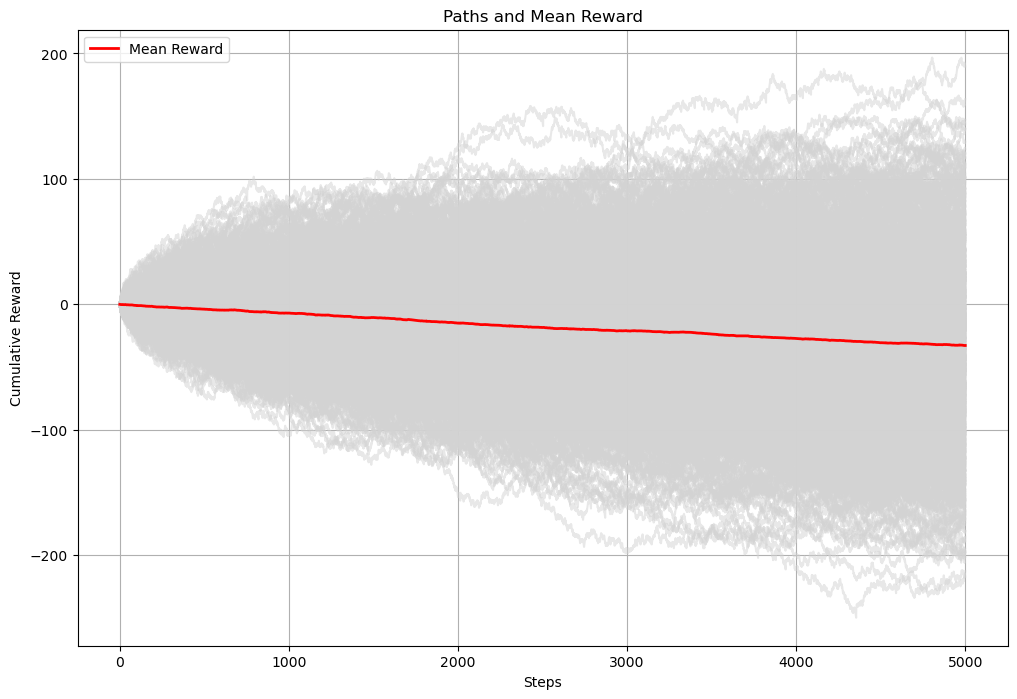

In [13]:
# 创建 DynamicSlotMachine实例, 并运行多条路径以获得平均奖励测试平稳性 

# (连续分布 - 对称代表 三角分布 )
slot_machine_continue = BernoulliDynamicBandit(
    J_distribution=triangular_J_distribution,
    num_steps=5000,
    seed=42  # 设置随机种子以获得可重复的结果
)

# 模拟多条路径
num_paths = 1000

all_rewards_continue = slot_machine_continue.simulate_multiple_paths(num_paths=num_paths, j_state_init=0,)

continue_mean_reward = slot_machine_continue.plot_paths_with_mean(all_rewards_continue)

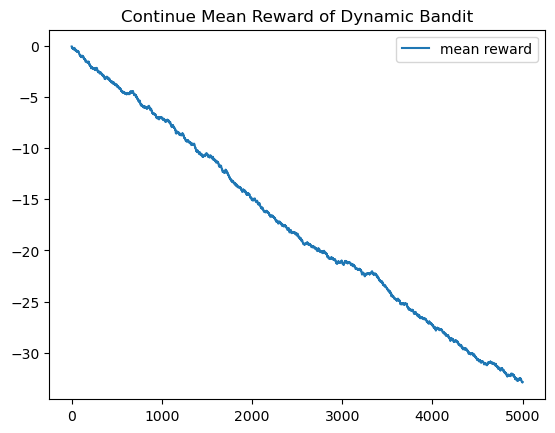

In [14]:
plt.plot(continue_mean_reward, label='mean reward')
plt.title('Continue Mean Reward of Dynamic Bandit')
plt.legend()
plt.show()

In [10]:
# np.cumsum([6/np.pi**2 * 1/i**2 for i in range(1, 1+10000000-1)])
# np.cumsum([1/(np.e*np.math.factorial(i)) for i in range(0, 0+20-1)])
np.cumsum([1/100]*100)

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [11]:
p=0.43226263905932044; J=6
2*p-1+(J-1) * p * (1 - p)**(J-1)/(1 - (1 - p)**(J-1))

-1.3877787807814457e-16

In [12]:
all_rewards_discrete.max()


128.0